# Handling missing values in apriori algorithm

# 1. Imports

In [2]:
# Add Code directory to path
import sys
import os
sys.path.append(os.path.join('..','Code'))

from missingValuesHandler import MissingValuesHandler, get_apriori_rules, add_missing_value, jaccard_similarity
from missingValuesHandler import analayze_score_by_dataset, analayze_score_by_model
from config import MISSING_RATIO, MODELS, DATASETS
from dataLoader import DataLoader
from estimator import Estimator

# 2. Datasets Loading

In [24]:
handler = MissingValuesHandler()
handler.load_data()
datasets = handler.get_datasets()

Datasets Loaded Successfully!
Data loaded succusfully for ['Hamberman', 'Iris', 'Wine']


## 2.1 initial datasets variables (first, "Wine" dataset example)

In [25]:
dataset_name = "Wine"

data = datasets[dataset_name]['data']
transactions = datasets[dataset_name]['transactions']
attributes = datasets[dataset_name]['attributes']

# 3. Full Datasets rules generation

In [26]:
full_rules = get_apriori_rules(transactions)
print (f"The Apriori algorithm calculates {len(full_rules)} rules from the full dataset")

The Apriori algorithm calculates 671 rules from the full dataset


# 4.Missing values Dataset

## 4.1 Missing values dataset creation

In [27]:
# Make the incomplete database (add missing values with the configured ratio)
incomplete_data = add_missing_value(data=data.copy(), ratio=MISSING_RATIO)

## 4.2 Missing values dataset rules generation

In [28]:
transactions = DataLoader.data_to_transactions(incomplete_data, attributes)
missing_rules = get_apriori_rules(transactions)

print (f"The Apriori algorithm calculates {len(missing_rules)} rules from the missing values dataset")
print(f"The missing values Dateset rules has {round(jaccard_similarity(full_rules, missing_rules) * 100, 2)}% Similarity to the full datasets rules")

The Apriori algorithm calculates 607 rules from the missing values dataset
The missing values Dateset rules has 83.36% Similarity to the full datasets rules


# 5. Using Machine learning techniques to estimate the correct missing values

In [29]:
all_datasets_scores = {}
dataset_models_score = {}

for model, model_name in MODELS.items():
    est = Estimator(incomplete_data)
    corrected_data = est.estimate_missing_value(model)

    transactions = DataLoader.data_to_transactions(corrected_data, attributes)
    estimated_rules = get_apriori_rules(transactions)

    print (f"After Using model: {model_name}")
    print (f"\tThe Apriori algorithm calculates {len(estimated_rules)} rules from the corrected dataset")
    print (f"\tWe got {round(jaccard_similarity(full_rules, estimated_rules) * 100, 2)}% Similarity to the full datasets rules")
    print ("\n")
    dataset_models_score[model_name] = {
        'estimated_values_score': round(jaccard_similarity(full_rules, estimated_rules) * 100, 2),
        'missing_values_score': round(jaccard_similarity(full_rules, missing_rules) * 100, 2)
    }


all_datasets_scores[dataset_name] = dataset_models_score

After Using model: XGBoost
	The Apriori algorithm calculates 675 rules from the corrected dataset
	We got 96.78% Similarity to the full datasets rules


After Using model: SGDRegressor
	The Apriori algorithm calculates 669 rules from the corrected dataset
	We got 97.93% Similarity to the full datasets rules


After Using model: KNeighborsRegressor
	The Apriori algorithm calculates 681 rules from the corrected dataset
	We got 95.38% Similarity to the full datasets rules


After Using model: LinearRegression
	The Apriori algorithm calculates 669 rules from the corrected dataset
	We got 97.06% Similarity to the full datasets rules


After Using model: Multi Layer Peceptron
	The Apriori algorithm calculates 691 rules from the corrected dataset
	We got 94.57% Similarity to the full datasets rules




# 6. Wine Results analayzing

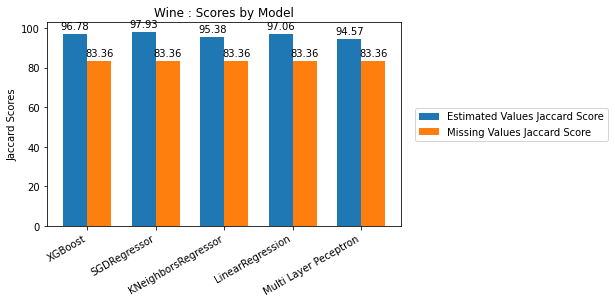

In [30]:
analayze_score_by_dataset(all_datasets_scores, dataset_name, save=False)

# 7. Run and analayze all datasets

In [31]:
# iterate all the datasets and apply the same logic that we have seen so far
handler.run_all_datasets()
# all scores are saved as a field in the handler
all_scores = handler.get_all_scores()

## 7.1 Per Dataset analyze

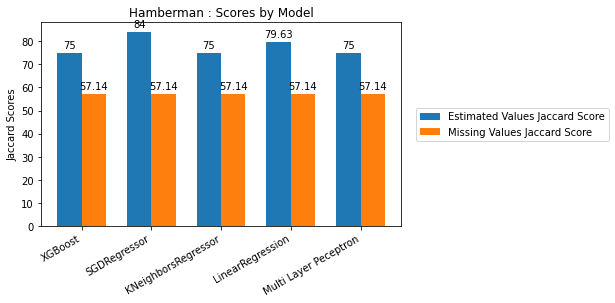

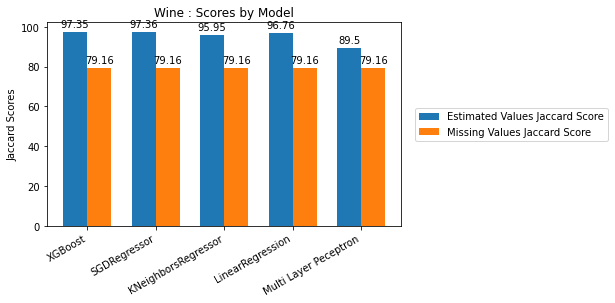

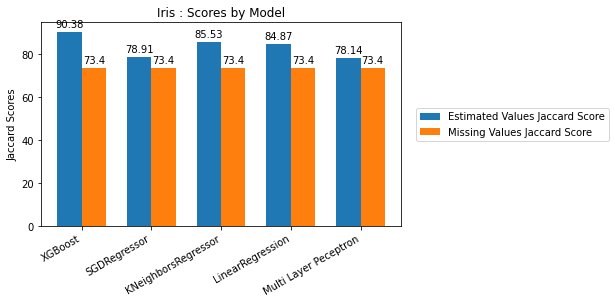

In [32]:
for dataset_name in DATASETS.keys():
    analayze_score_by_dataset(all_scores, dataset_name, save=False)

## 7.2 Per Model analyze

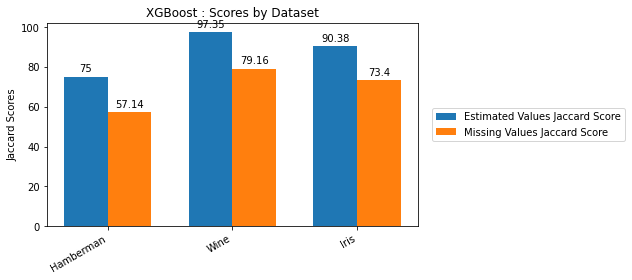

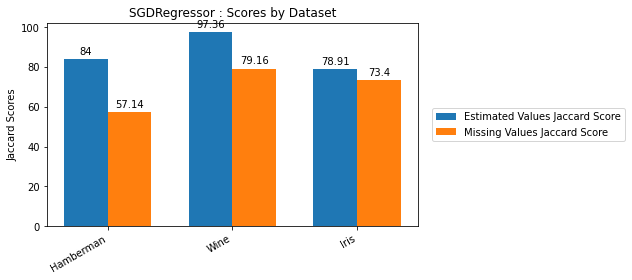

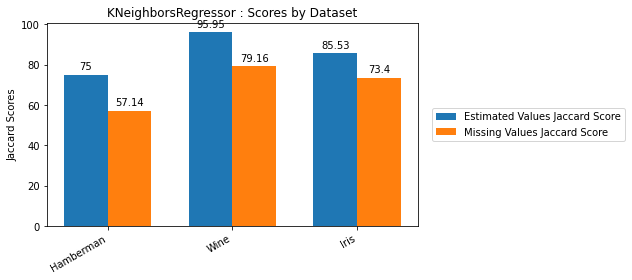

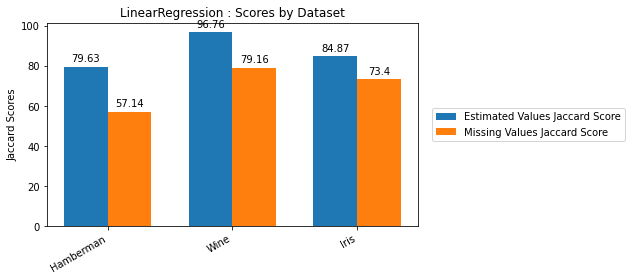

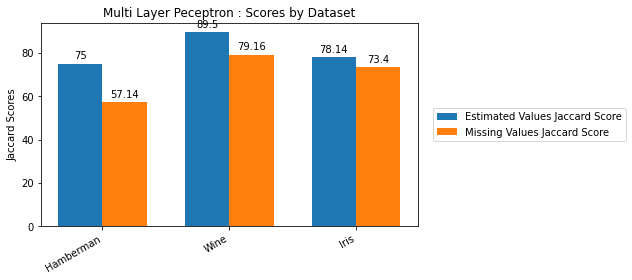

In [33]:
for _, model_name in MODELS.items():
    analayze_score_by_model(all_scores, model_name, save=False)